## Libraries

In [44]:
import numpy as np
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import glob
import sys
from utils import cond_cols, pop_cols

In [73]:
cond_cols['CTL']="#78E1DF"
pop_cols['Fulani']="#E07C97"
pop_cols['Tikari'] = "#7686E1"

## QC metrics

In [ ]:
adata = sc.read_h5ad("../../test/test123/write/qc_020725_wctypes.harmony.umap.h5ad")

In [27]:
pop_fids_df = adata.obs[['Ethnicity','FID']].drop_duplicates()

In [32]:
pop_fids = {'Tikari': set(pop_fids_df[pop_fids_df['Ethnicity']=="Tikari"]['FID']),
            'Fulani': set(pop_fids_df[pop_fids_df['Ethnicity']=="Fulani"]['FID']),
            'CHG': set(pop_fids_df[pop_fids_df['Ethnicity']=="CHG"]['FID'])}

### Cell counts per individual

In [22]:
samp_cnts = adata.obs.groupby(['FID','COND']).size().reset_index().rename(columns={0: 'ncells'})

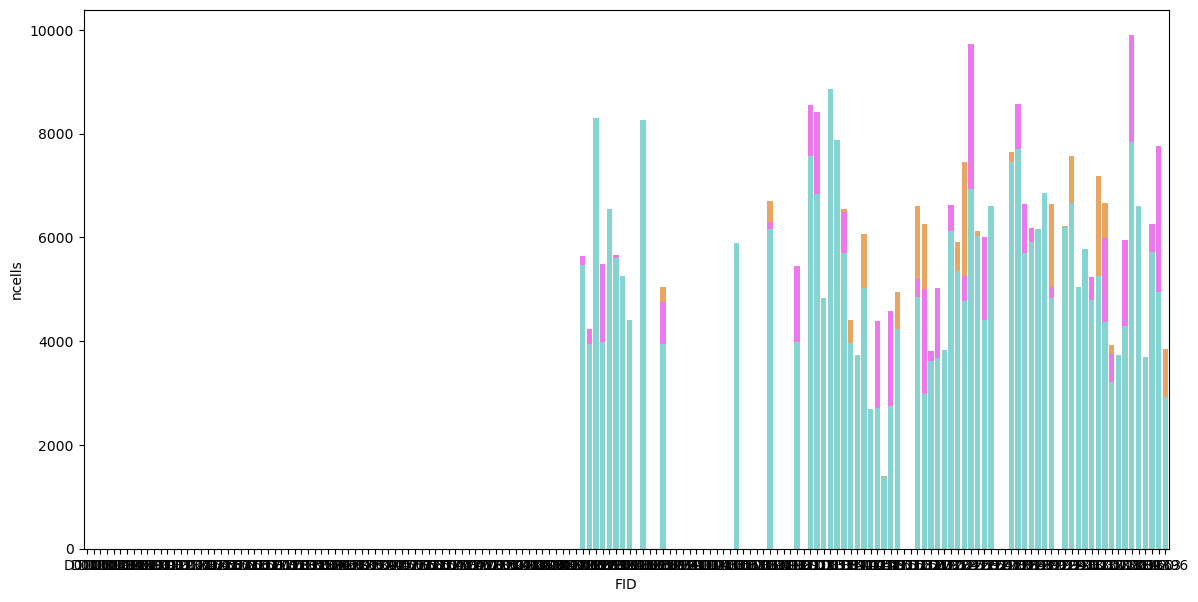

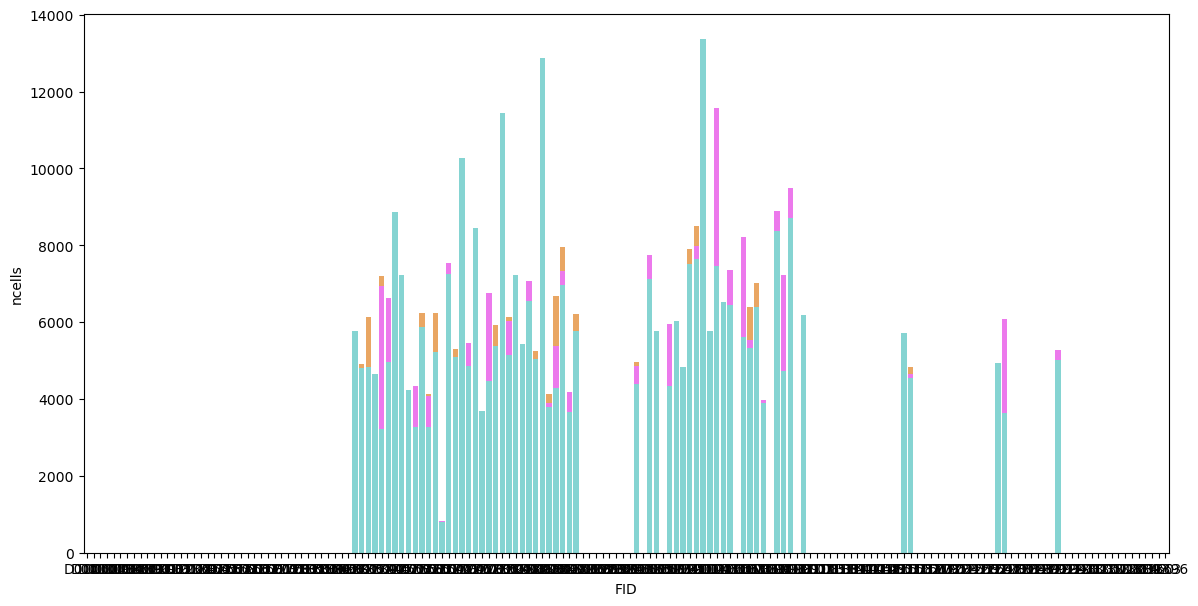

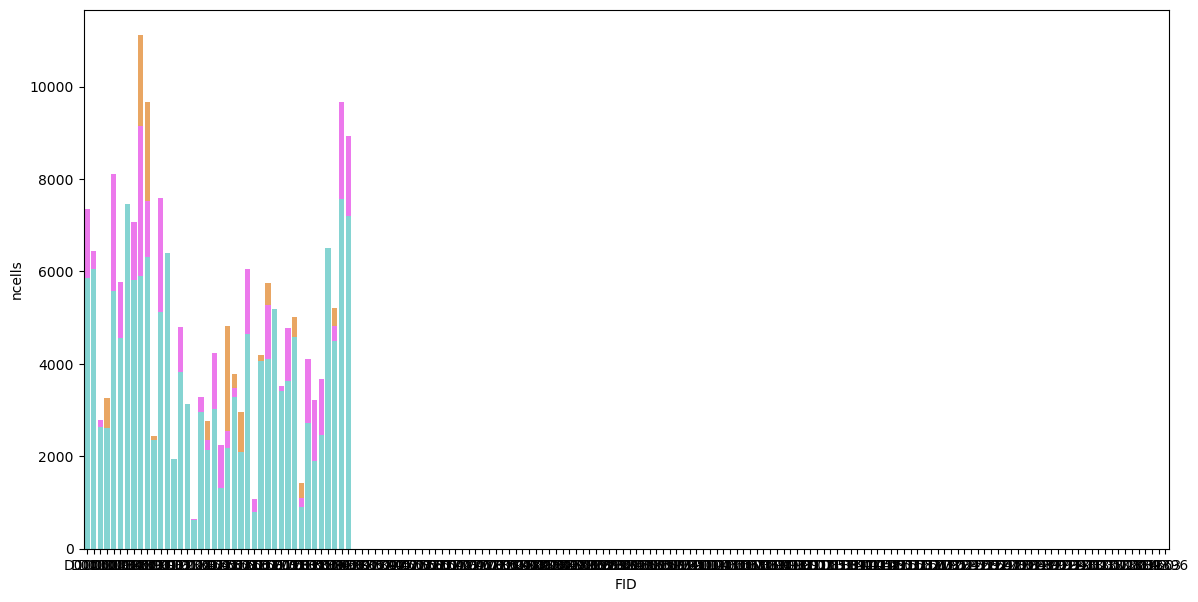

In [74]:
for pop in ['Tikari','Fulani','CHG']:

    df = samp_cnts[samp_cnts['FID'].isin(pop_fids[pop])]
    

    plt.figure(figsize=(14, 7))

    bar3 = sns.barplot(x="FID",  y="ncells", data=df[df['COND']=="LPS"], color=cond_cols['LPS'])
    bar2 = sns.barplot(x="FID",  y="ncells", data=df[df['COND']=="IFN"], color=cond_cols['IFN'])
    bar1 = sns.barplot(x="FID",  y="ncells", data=df[df['COND']=="CTL"], color=cond_cols['CTL'])

    plt.show()


In [75]:
adata.obs.groupby(['FID']).size().reset_index().rename(columns={0: 'ncells'}).sort_values('ncells')

,FID,ncells
16,D0138,1846
53,D0764,2444
25,D0167,2809
32,D0185,3421
119,D1149,4052
...,...,...
156,D1323,26961
94,D1043,27038
56,D0774,27620
92,D1002,33632


In [ ]:

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

### Pathogens